## Visualization of Kaggle-Treinding Dataset.

In [129]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
import json

In [3]:
SECS_IN_HOUR=3600

In [126]:
url="./data/trending-videos.csv"
category_json_path = "./data/category_id.json"

df=pd.read_csv(url)

In [136]:
# category_dict where keys are the categroy ids and values are the category name

category_dict = {}

# read category json
with open(category_json_path) as json_file:
    data = json.load(json_file)
    for item in data['items']:
        category_dict[item['id']] = item['snippet']['title']        

In [5]:
# Add Title length to the mix
df["title_length"] = df["title"].apply(lambda x: len(x))
df.head()

video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   

   category_id              publish_time  \
0           22  2017-11-13T17:13:01.000Z   
1           24  2017-11-13T07:30:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-13T11:00:04.000Z   
4           24  2017-11-12T18:01:41.000Z   

                                                tags    views   likes  \
0                                    SHANtell martin   748374   57527   
1  last week tonight trump presidency|"last week ...  2418783   97185   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...  3191434  146033   
3  rhett and link|"gmm"|"good mythical morning"|"...   343168   10172   
4  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...  2095731  132235   

   dislikes  comment_count                                  thumbnail_link  \
0      2966          15954  https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg   
1      6146          12703  https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3       666           2146  https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg   
4      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  title_length  
0  SHANTELL'S CHANNEL - https://www.youtube.com/s...            34  
1  One year after the presidential election, John...            62  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...            53  
3  Today we find out if Link is a Nickelback amat...            32  
4  I know it's been a while since we did this sho...            24

In [6]:
views=df["views"]
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 17 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
title_length              40949 non-null int64
dtypes: bool(3), int64(6), object(8)
memory usage: 4.5+ MB


In [7]:
df.describe()

category_id         views         likes      dislikes  comment_count  \
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04   
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03   
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04   
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00   
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02   
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03   
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03   
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06   

       title_length  
count  40949.000000  
mean      48.578183  
std       19.619025  
min        3.000000  
25%       34.000000  
50%       46.000000  
75%       61.000000  
max      100.000000

In [8]:
df.corr()

category_id     views     likes  dislikes  \
category_id                1.000000 -0.168231 -0.173921 -0.033547   
views                     -0.168231  1.000000  0.849177  0.472213   
likes                     -0.173921  0.849177  1.000000  0.447186   
dislikes                  -0.033547  0.472213  0.447186  1.000000   
comment_count             -0.076307  0.617621  0.803057  0.700184   
comments_disabled          0.048949  0.002677 -0.028918 -0.004431   
ratings_disabled          -0.013506  0.015355 -0.020888 -0.008230   
video_error_or_removed    -0.030011 -0.002256 -0.002641 -0.001853   
title_length               0.024199 -0.035612 -0.078166 -0.031235   

                        comment_count  comments_disabled  ratings_disabled  \
category_id                 -0.076307           0.048949         -0.013506   
views                        0.617621           0.002677          0.015355   
likes                        0.803057          -0.028918         -0.020888   
dislikes                     0.700184          -0.004431         -0.008230   
comment_count                1.000000          -0.028277         -0.013819   
comments_disabled           -0.028277           1.000000          0.319230   
ratings_disabled            -0.013819           0.319230          1.000000   
video_error_or_removed      -0.003725          -0.002970         -0.001526   
title_length                -0.067043           0.026668          0.001442   

                        video_error_or_removed  title_length  
category_id                          -0.030011      0.024199  
views                                -0.002256     -0.035612  
likes                                -0.002641     -0.078166  
dislikes                             -0.001853     -0.031235  
comment_count                        -0.003725     -0.067043  
comments_disabled                    -0.002970      0.026668  
ratings_disabled                     -0.001526      0.001442  
video_error_or_removed                1.000000     -0.013833  
title_length                         -0.013833      1.000000

<IPython.core.display.Javascript object>


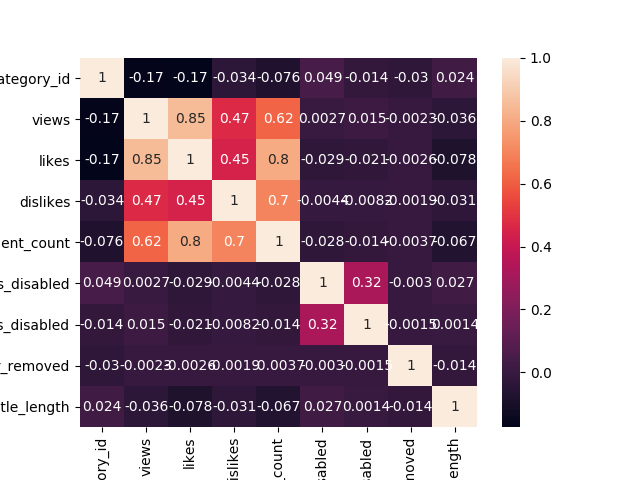

In [9]:
fig=plt.figure()
fig.size=(6,6)
sns.heatmap(df.corr(), annot=True)

<IPython.core.display.Javascript object>


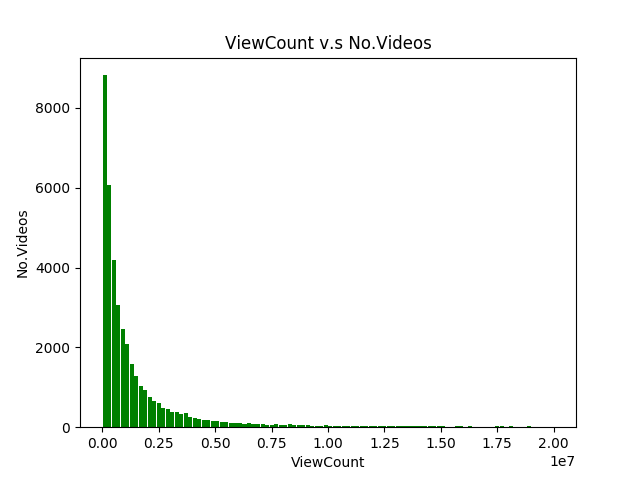

In [10]:
def plot_view_count():

    range=(0,2e7)
    intervals=100
    
    fig = plt.figure()
    plt.hist(views,intervals, range, color = 'green', 
        histtype = 'bar', rwidth = 0.9)
    
    # x-axis label 
    plt.xlabel('ViewCount') 
    # frequency label 
    plt.ylabel('No.Videos') 
    # plot title 
    plt.title('ViewCount v.s No.Videos') 
    
    plt.show()

plot_view_count()

<IPython.core.display.Javascript object>


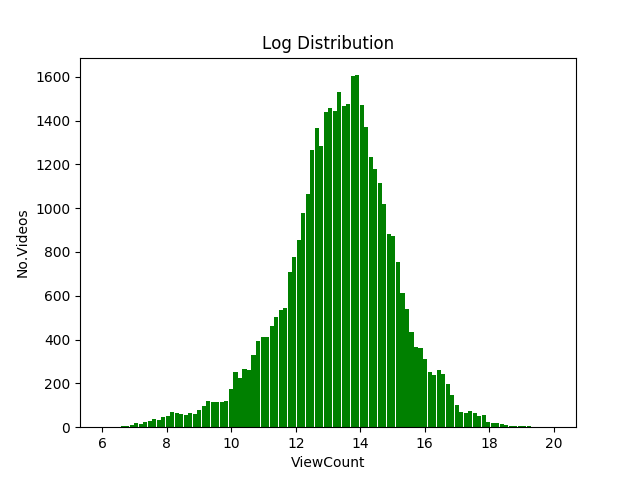

In [11]:
def log_distribution():
    range=(6,20)
    intervals=100
    
    fig = plt.figure()
    plt.hist(np.log(views),intervals, range, color = 'green', 
        histtype = 'bar', rwidth = 0.9)
    
    # x-axis label 
    plt.xlabel('ViewCount') 
    # frequency label 
    plt.ylabel('No.Videos') 
    # plot title 
    plt.title('Log Distribution') 
    
    plt.show()

log_distribution()

## Video age when appeared in trending list (in Hours)

Age = Trending_date - Publish_Time 

In [12]:
ydm_format='%y.%d.%m'
trending_date_string=df['trending_date']
trending_date_obj=[dt.datetime.strptime(x,ydm_format) for x in trending_date_string]

publish_date=df['publish_time']
publish_date_format='%Y-%m-%dT%H:%M:%S.000Z'
publish_date_obj=[dt.datetime.strptime(x,publish_date_format) for x in publish_date]

age=[ abs((tr - pub).seconds/SECS_IN_HOUR) for (tr,pub) in zip(trending_date_obj, publish_date_obj)]

# number of videos for which 0 time elapsed from publish time to 
# trending date
sum(v_age==0 for v_age in age)


34

<IPython.core.display.Javascript object>


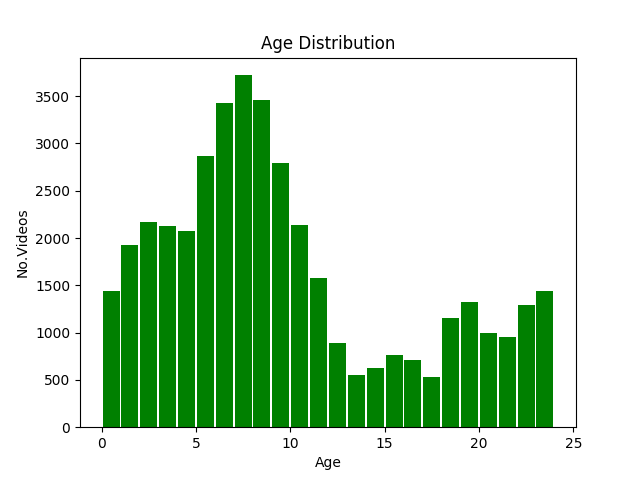

In [13]:
def plot_age_distr():
    range=(0,24)
    intervals=24
    
    fig = plt.figure()
    plt.hist(age,intervals, range, color = 'green', 
        histtype = 'bar', rwidth = 0.9)
    
    # x-axis label 
    plt.xlabel('Age') 
    # frequency label 
    plt.ylabel('No.Videos') 
    # plot title 
    plt.title('Age Distribution')     
    plt.show()

plot_age_distr()

## Number of views per hour

view_velocity = views/age

<IPython.core.display.Javascript object>


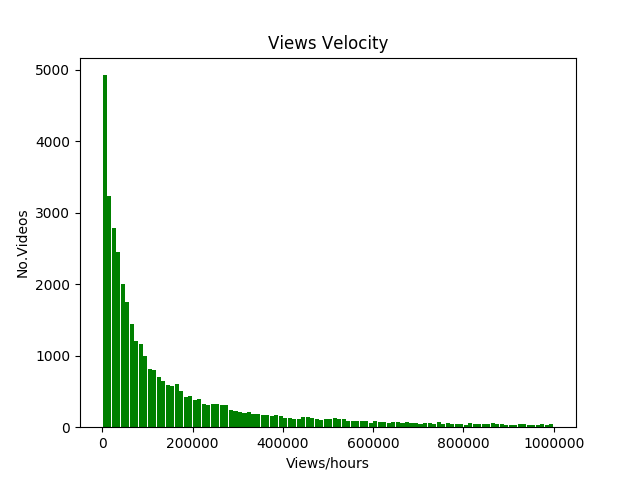

In [14]:
# we filter out the (n_views,age) tuples where age = 0. 
view_velocity=[ (n_views/age) for (n_views,age) in filter(lambda x: x[1]>0,zip(views, age))]

def view_veloc_distr():
    range=(0,1e6)
    intervals=100
    
    fig = plt.figure()
    plt.hist(view_velocity,intervals, range, color = 'green', 
        histtype = 'bar', rwidth = 0.9)
    
    # x-axis label 
    plt.xlabel('Views/hours') 
    # frequency label 
    plt.ylabel('No.Videos') 
    # plot title 
    plt.title('Views Velocity')     
    plt.show()

view_veloc_distr()

<IPython.core.display.Javascript object>


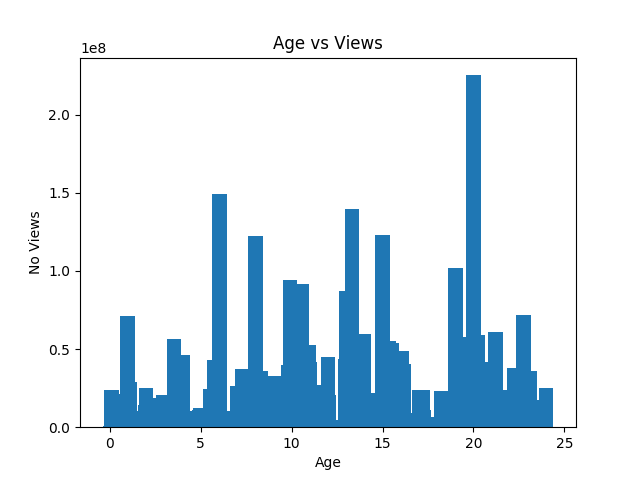

In [155]:
def age_vs_views():
    range=(0,1e6)
    intervals=100
    
    fig = plt.figure()
    plt.bar(age,views)
    
    # x-axis label 
    plt.xlabel('Age') 
    # frequency label 
    plt.ylabel('No Views') 
    # plot title 
    plt.title('Age vs Views')     
    plt.show()

age_vs_views()

<IPython.core.display.Javascript object>


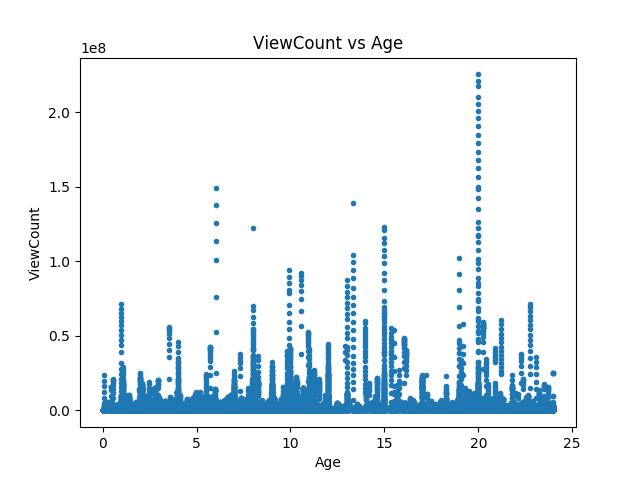

In [17]:
def scatter_plot_age_vs_views():
    fig=plt.figure()
    plt.scatter(age,views, marker='.')
    plt.xlabel("Age")
    plt.ylabel("ViewCount")
    plt.title("ViewCount vs Age")
    plt.show()

scatter_plot_age_vs_views()

## Category Distribution

In [137]:
categories=df.category_id.value_counts()
categories.values
categories.index

Int64Index([24, 10, 26, 23, 22, 25, 28, 1, 17, 27, 15, 20, 19, 2, 29, 43], dtype='int64')

In [154]:
labels = [category_dict[str(id_key)] for id_key in categories.index ]
category_dict

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [152]:
def plot_category_distr():
        
    fig = plt.figure(figsize=(9,5))
    plt.bar(2*categories.index,height=categories.values,width=0.75)
    labels = [category_dict[str(id_key)] for id_key in categories.index ]
    
    # x-axis label 
    plt.xlabel('Category Id') 
    # frequency label 
    plt.ylabel('No.Videos') 
    # plot title 
    plt.title('Category Distribution')     

    plt.xticks(2*categories.index, labels, rotation=90,fontsize=5)
    
    plt.show()

<IPython.core.display.Javascript object>


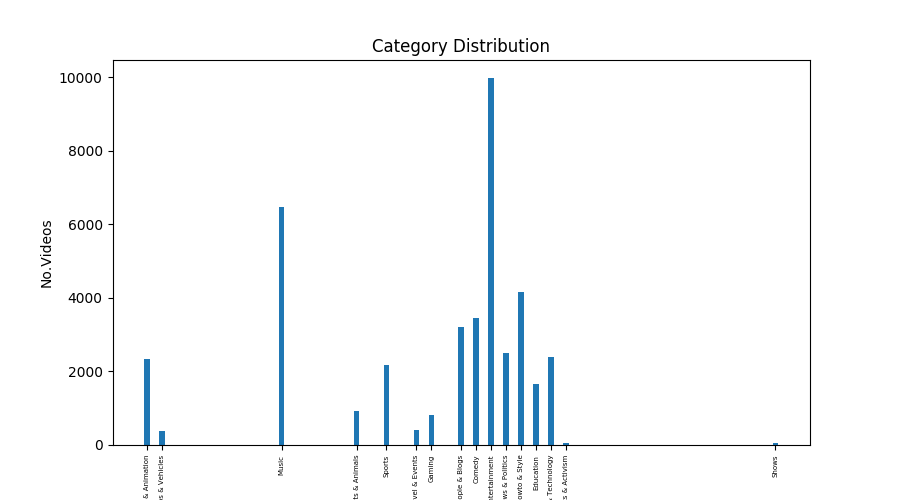

In [153]:
plot_category_distr()